In [1]:
import pandas as pd
import nfl_data_py as nfl
import numpy
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
df1 = nfl.import_pbp_data([2022], downcast=True, cache=False, alt_path=None)

2022 done.
Downcasting floats.


In [3]:
df1.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [4]:
df1['play_type'] = df1.apply(lambda row: 'pass' if (row['qb_scramble'] == 1) else row['play_type'], axis=1)

In [5]:
plays = df1[(df1['play_type'] == 'run') | (df1['play_type'] == 'pass')]

In [6]:
regular_season = plays[plays['season_type'] == 'REG']

In [19]:
def downs_bin(row):
    if row['ydstogo'] <= 3:
        return 'Short (<=3)'
    elif 3 < row['ydstogo'] <= 8:
        return 'Medium (4-8)'
    elif 8 < row['ydstogo'] <= 12:
        return 'Long (9-12)'
    else:
        return 'Very Long (13+)'

In [20]:
regular_season['downs_label'] = regular_season.apply(lambda row: downs_bin(row), axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_2952\638280399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_season['downs_label'] = regular_season.apply(lambda row: downs_bin(row), axis=1)


In [14]:
regular_season['down'].fillna('2pt Conv', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_2952\2188890917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_season['down'].fillna('2pt Conv', inplace=True)


Series([], Name: two_point_conv_result, dtype: int64)

In [33]:
regular_season[regular_season['offense_formation'].isnull()].head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [9]:
play_counts = regular_season.groupby(['posteam', 'play_type'])['play_id'].count()

In [10]:
play_counts = play_counts.unstack()
play_counts = play_counts.reset_index()

In [11]:
play_counts['pass_prob'] = play_counts['pass'] / (play_counts['pass'] + play_counts['run'])

In [12]:
play_counts.columns

Index(['posteam', 'pass', 'run', 'pass_prob'], dtype='object', name='play_type')

In [13]:
play_counts.sort_values('pass_prob')

play_type,posteam,pass,run,pass_prob
1,ATL,488,512,0.488000
5,CHI,513,476,0.518706
4,CAR,511,461,0.525720
30,TEN,531,450,0.541284
28,SF,561,474,0.542029
8,DAL,600,501,0.544959
2,BAL,567,467,0.548356
31,WAS,635,500,0.559471
7,CLE,620,484,0.561594
22,NO,566,441,0.562066


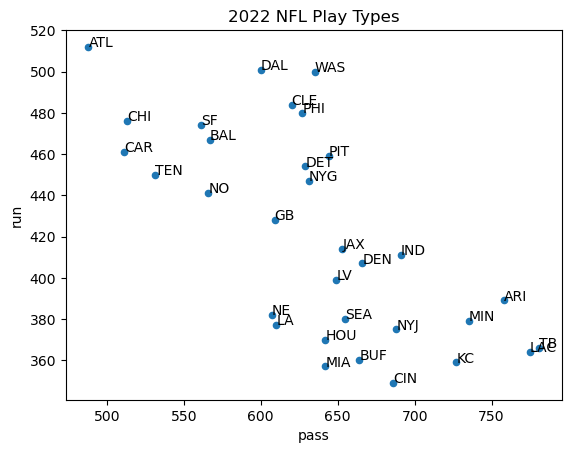

In [14]:
fig, ax = plt.subplots()

play_counts.plot('pass', 'run', kind='scatter', ax=ax)
plt.title('2022 NFL Play Types')

for idx, row in play_counts.iterrows():
    ax.annotate(row['posteam'], (row['pass'], row['run']))

In [15]:
league_downs = regular_season.groupby(['down', 'play_type'])['play_id'].count()

In [16]:
league_downs = league_downs.unstack()
league_downs = league_downs.reset_index()

In [17]:
league_downs['pass_prob'] = league_downs['pass'] / (league_downs['pass'] + league_downs['run'])

In [18]:
league_downs.sort_values('pass_prob')

play_type,down,pass,run,pass_prob
0,1.0,7339,7431,0.496886
1,2.0,6956,4306,0.617652
3,4.0,471,264,0.640816
2,3.0,5507,1441,0.792602


Text(0.5, 1.0, '2022 NFL Play Types by Down')

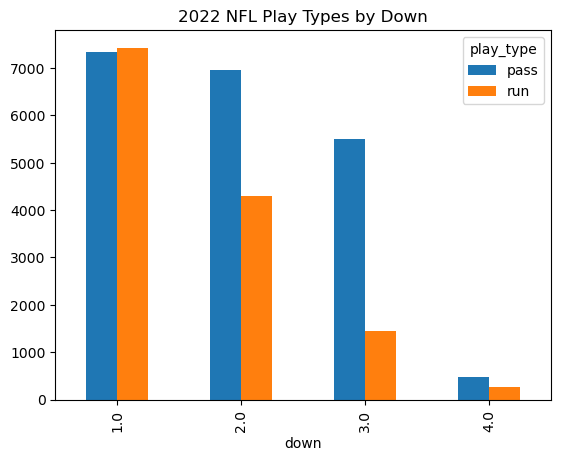

In [19]:
fig, ax = plt.subplots()

league_downs.plot('down', ['pass', 'run'], kind='bar', ax=ax)
plt.title('2022 NFL Play Types by Down')

In [20]:
quarter_plays = regular_season.groupby(['qtr', 'play_type'])['play_id'].count()

In [21]:
quarter_plays = quarter_plays.unstack()
quarter_plays = quarter_plays.reset_index()

In [22]:
quarter_plays['pass_prob'] = quarter_plays['pass'] / (quarter_plays['pass'] + quarter_plays['run'])

In [23]:
quarter_plays.sort_values('pass_prob')

play_type,qtr,pass,run,pass_prob
0,1.0,4341,3250,0.571861
2,3.0,4387,3268,0.573089
3,4.0,5648,3493,0.617876
4,5.0,186,108,0.632653
1,2.0,5799,3353,0.633632


Text(0.5, 1.0, '2022 NFL Play Types by Quarter')

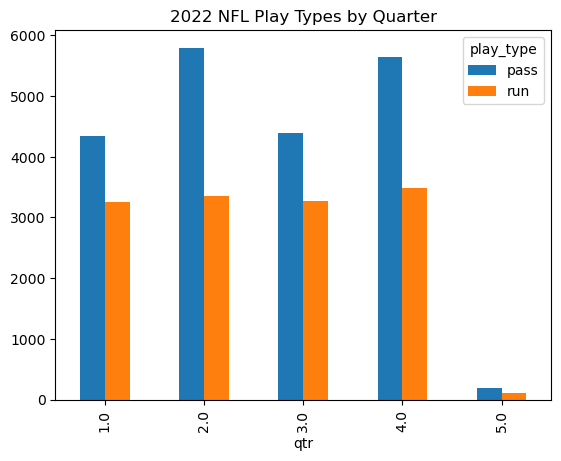

In [24]:
fig, ax = plt.subplots()

quarter_plays.plot('qtr', ['pass', 'run'], kind='bar', ax=ax)
plt.title('2022 NFL Play Types by Quarter')

In [25]:
togo_plays = regular_season.groupby(['downs_label', 'play_type'])['play_id'].count()

In [26]:
togo_plays = togo_plays.unstack()
togo_plays = togo_plays.reset_index()

In [27]:
togo_plays['pass_prob'] = togo_plays['pass'] / (togo_plays['pass'] + togo_plays['run'])

In [28]:
togo_plays.sort_values('pass_prob')

play_type,downs_label,pass,run,pass_prob
2,Short (<=3),2123,2601,0.449407
0,Long (9-12),10747,7965,0.574337
1,Medium (4-8),5440,2487,0.686262
3,Very Long (13+),2051,419,0.830364


Text(0.5, 1.0, '2022 NFL Play Mix by Distance to Go')

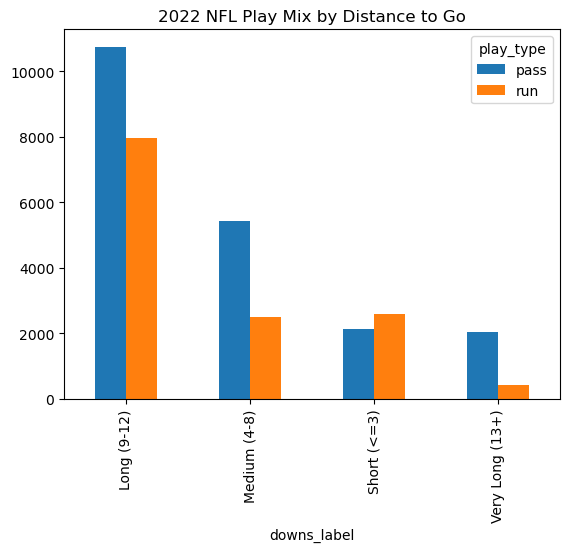

In [29]:
fig, ax = plt.subplots()

togo_plays.plot('downs_label', ['pass', 'run'], kind='bar', ax=ax)
plt.title('2022 NFL Play Mix by Distance to Go')

In [30]:
first = regular_season[regular_season['down'] == 1]
second = regular_season[regular_season['down'] == 2]
third = regular_season[regular_season['down'] == 3]
fourth = regular_season[regular_season['down'] == 4]

In [31]:
firstdown_plays = first.groupby(['downs_label', 'play_type'])['play_id'].count()
seconddown_plays = second.groupby(['downs_label', 'play_type'])['play_id'].count()
thirddown_plays = third.groupby(['downs_label', 'play_type'])['play_id'].count()
fourthdown_plays = fourth.groupby(['downs_label', 'play_type'])['play_id'].count()

In [32]:
firstdown_plays = firstdown_plays.unstack()
firstdown_plays = firstdown_plays.reset_index()

seconddown_plays = seconddown_plays.unstack()
seconddown_plays = seconddown_plays.reset_index()

thirddown_plays = thirddown_plays.unstack()
thirddown_plays = thirddown_plays.reset_index()

fourthdown_plays = fourthdown_plays.unstack()
fourthdown_plays = fourthdown_plays.reset_index()

In [33]:
firstdown_plays['pass_prob'] = firstdown_plays['pass'] / (firstdown_plays['pass'] + firstdown_plays['run'])
seconddown_plays['pass_prob'] = seconddown_plays['pass'] / (seconddown_plays['pass'] + seconddown_plays['run'])
thirddown_plays['pass_prob'] = thirddown_plays['pass'] / (thirddown_plays['pass'] + thirddown_plays['run'])
fourthdown_plays['pass_prob'] = fourthdown_plays['pass'] / (fourthdown_plays['pass'] + fourthdown_plays['run'])

In [34]:
firstdown_plays.sort_values('pass_prob')

play_type,downs_label,pass,run,pass_prob
2,Short (<=3),87,194,0.309609
1,Medium (4-8),163,315,0.341004
0,Long (9-12),6693,6773,0.497030
3,Very Long (13+),396,149,0.726606


In [35]:
seconddown_plays.sort_values('pass_prob')

play_type,downs_label,pass,run,pass_prob
2,Short (<=3),704,1091,0.392201
1,Medium (4-8),2722,1921,0.586259
0,Long (9-12),2693,1113,0.707567
3,Very Long (13+),837,181,0.822200


In [36]:
thirddown_plays.sort_values('pass_prob')

play_type,downs_label,pass,run,pass_prob
2,Short (<=3),1006,1036,0.492654
3,Very Long (13+),770,86,0.899533
1,Medium (4-8),2415,243,0.908578
0,Long (9-12),1316,76,0.945402


In [37]:
fourthdown_plays.sort_values('pass_prob')

play_type,downs_label,pass,run,pass_prob
2,Short (<=3),238,250,0.487705
0,Long (9-12),45,3,0.937500
3,Very Long (13+),48,3,0.941176
1,Medium (4-8),140,8,0.945946


Text(0.5, 1.0, '2022 NFL Fourth Down Play Mix')

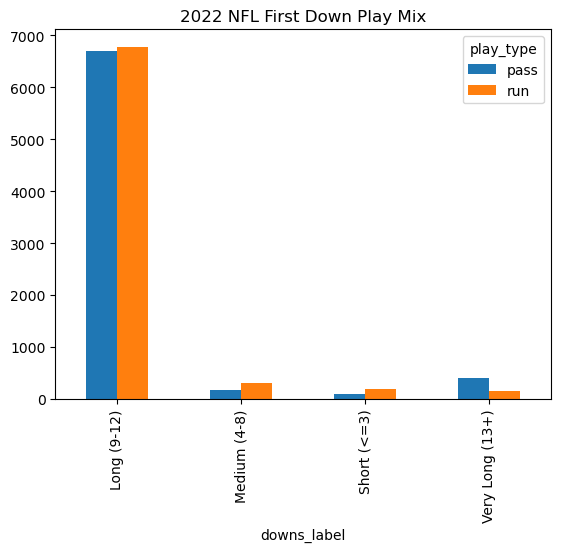

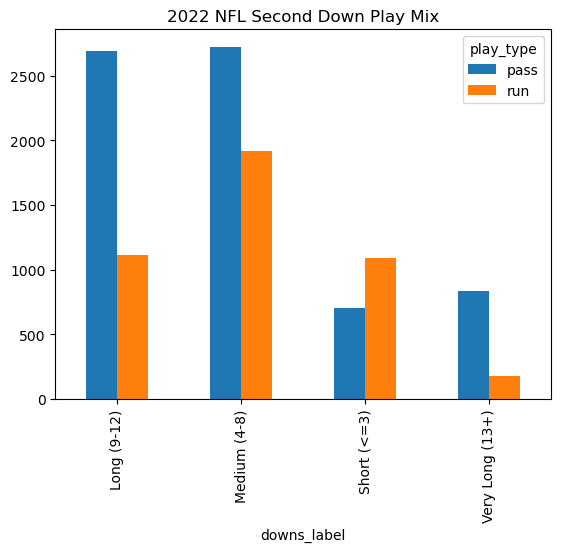

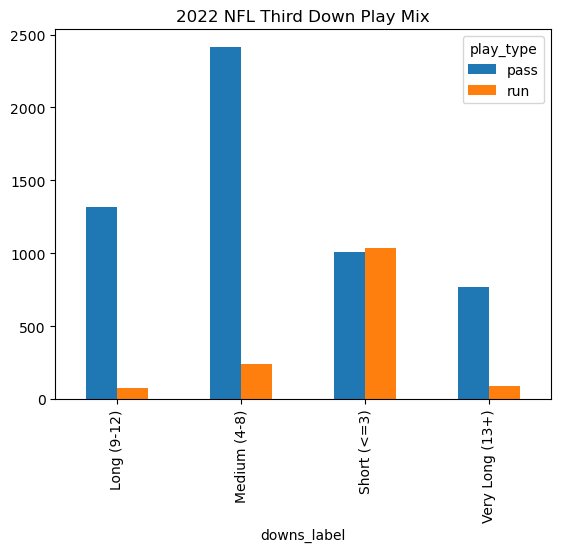

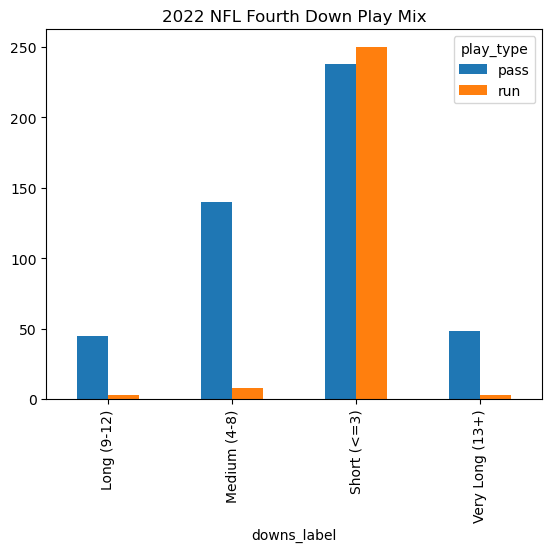

In [45]:
fig, ax = plt.subplots()

firstdown_plays.plot('downs_label', ['pass', 'run'], kind='bar', ax=ax)
plt.title('2022 NFL First Down Play Mix')

fig, ax = plt.subplots()

seconddown_plays.plot('downs_label', ['pass', 'run'], kind='bar', ax=ax)
plt.title('2022 NFL Second Down Play Mix')

fig, ax = plt.subplots()

thirddown_plays.plot('downs_label', ['pass', 'run'], kind='bar', ax=ax)
plt.title('2022 NFL Third Down Play Mix')

fig, ax = plt.subplots()

fourthdown_plays.plot('downs_label', ['pass', 'run'], kind='bar', ax=ax)
plt.title('2022 NFL Fourth Down Play Mix')

In [1]:
from platform import python_version

print(python_version())

3.10.9
